# This notebook will combine the prediction bit and the optimisation bit to see how the algorithm perform

In [1]:
# Magic line to avoid explicitely write plt.show()
%matplotlib inline

In [2]:
#do not show warnings
import warnings
warnings.filterwarnings("ignore")

## First part : Optimisation for cluster #0 (just as a test)

In [3]:
import pandas as pd

In [4]:
sales_clusters_df=pd.read_csv('../data/raw/sales_cluster_table.csv')

In [5]:
sales_clusters_df['noisy_date']=pd.to_datetime(sales_clusters_df['noisy_date'])

In [6]:
# The library I created is called FaaS : Forecast as a Service
import FaaS

In [7]:
help(FaaS.print_msg)

Help on function print_msg in module FaaS:

print_msg(msg)



In [8]:
sales_clusters_df.head()

,product_code,noisy_date,noisy_quantity,Cluster
0,CLA0,2017-12-28,5038.619159,0
1,CLA0,2018-03-11,4658.195181,0
2,CLA0,2018-05-18,4676.433462,0
3,CLA0,2018-07-25,5067.550234,0
4,CLA0,2018-10-04,4602.628398,0


In [9]:
sales_clusters_df.rename(index=str,
                        columns={'product_code':'product'},inplace=True)

100%|██████████| 32/32 [00:01<00:00, 16.53it/s]


------------------------------
The workload is reduced by 40%
------------------------------


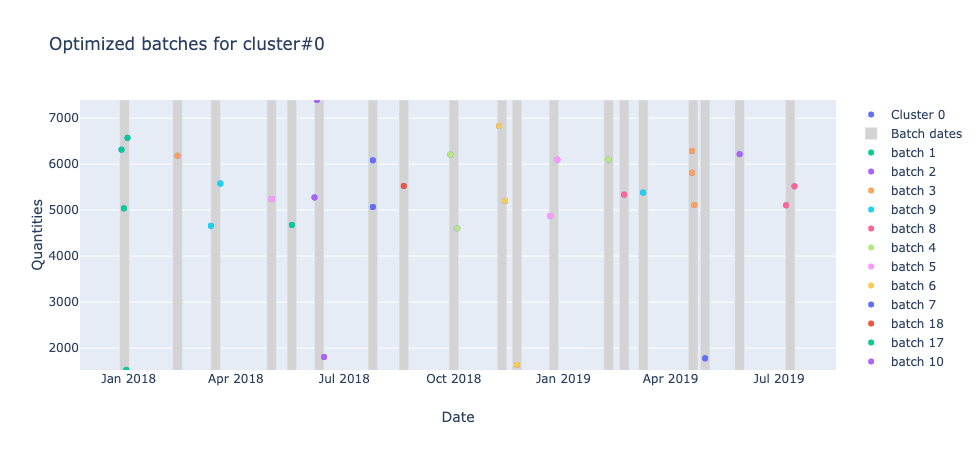

In [10]:
sales_cluster_0_optimization=FaaS.optimize_orders_processing(sales_clusters_df,0,'10 days')

In [11]:
sales_cluster_0_optimization.head()

,noisy_quantity,product,number_of_previous_neighbours,batch,batch_date
noisy_date,,,,,
2017-12-26,6314.400966,CLB1,1.0,1,2017-12-28 12:00:00
2017-12-28,5038.619159,CLA0,2.0,1,2017-12-28 12:00:00
2017-12-30,1522.967281,CLD3,3.0,1,2017-12-28 12:00:00
2017-12-31,6572.009204,CLC0,4.0,1,2017-12-28 12:00:00
2018-02-11,6181.772772,CLB1,1.0,11,2018-02-11 00:00:00


## Second part: Forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


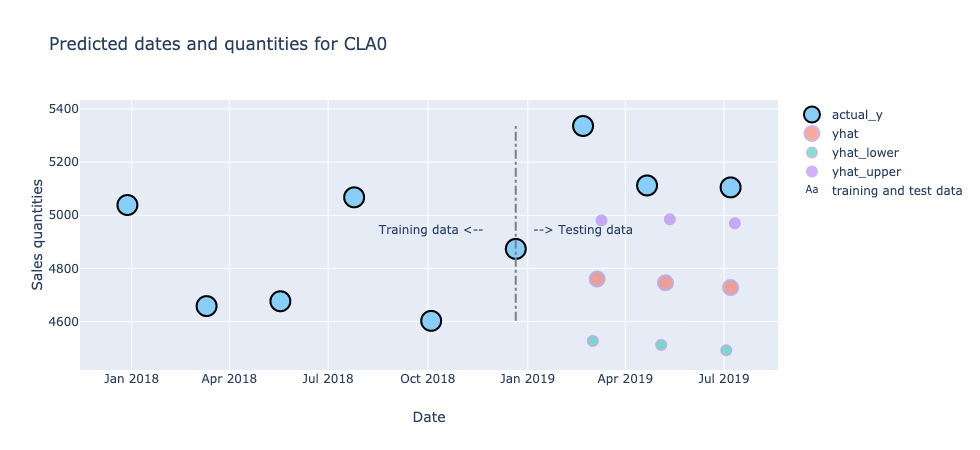

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


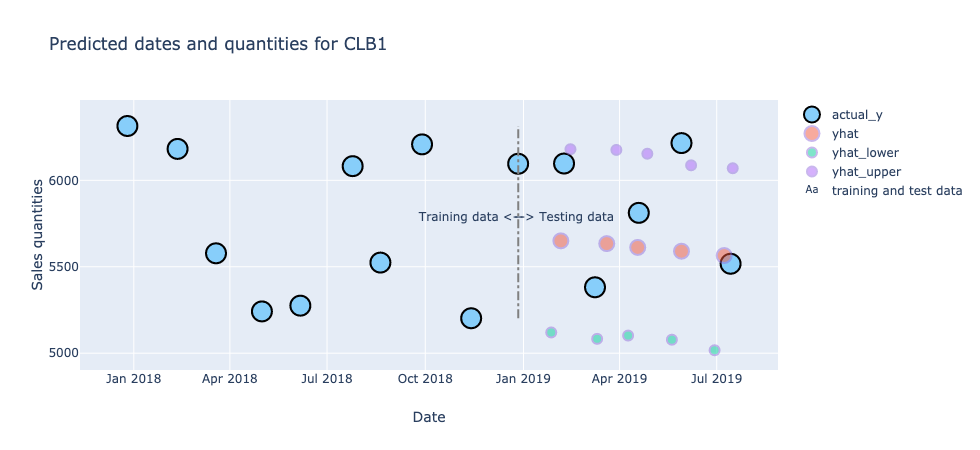

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


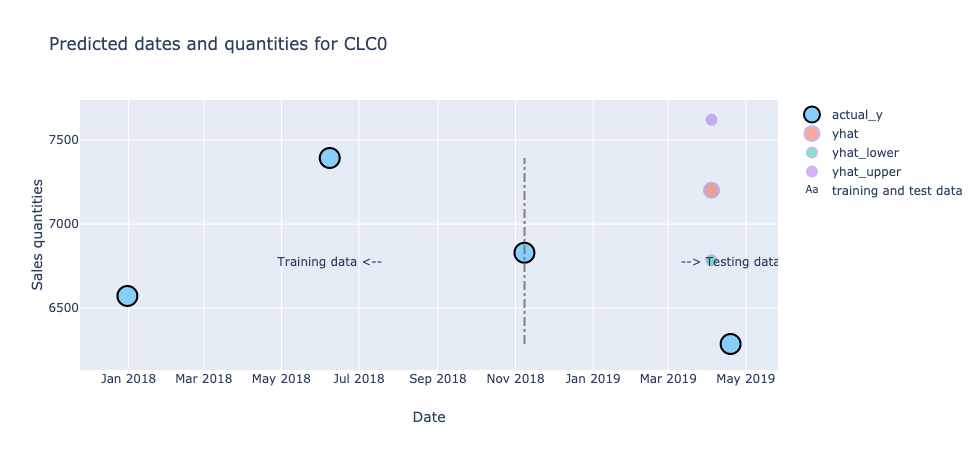

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 0.


---------------------------------
--> Now training the "date model"
---------------------------------


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.


-------------------------------------
--> Now training the "quantity model"
-------------------------------------


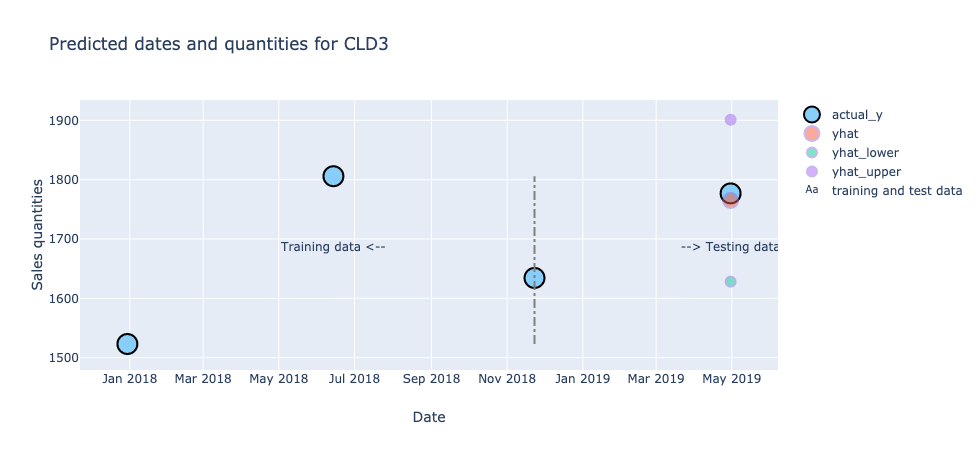

0
CLB1
1
CLC0
2
CLD3


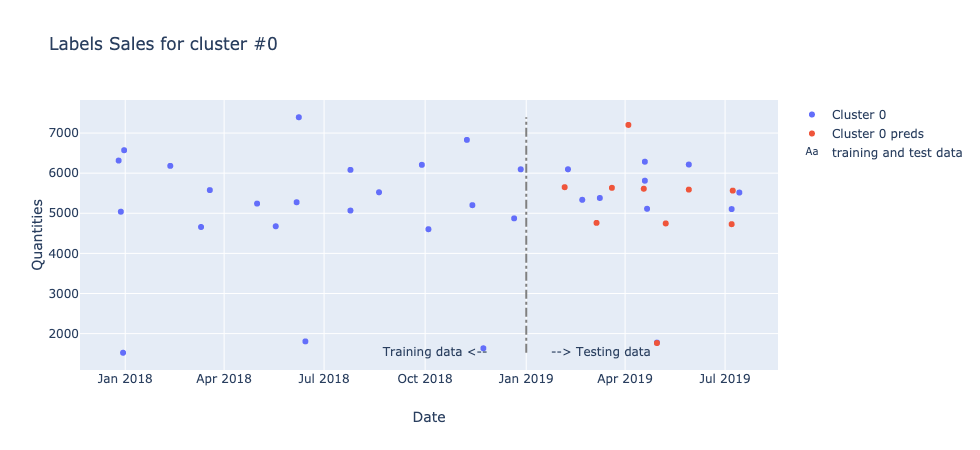

In [12]:
cluster_0_aggregated_preds=FaaS.get_aggregated_preds(sales_clusters_df,0,'2019-01-01')

# Now combining both!

In [13]:
#Forecast
cluster_0_aggregated_preds.head()

,ds,yhat_qty,yhat_lower_qty,yhat_upper_qty,yhat_date,yhat_lower_date,yhat_upper_date,y,product
0,2017-12-28,4861.637512,4633.204712,5122.921593,NaT,NaT,NaT,5038.619159,CLA0
1,2018-03-11,4844.114412,4597.176618,5074.485529,2018-03-06,2018-03-02,2018-03-10,4658.195181,CLA0
2,2018-05-18,4827.791540,4597.344099,5048.967898,2018-05-20,2018-05-16,2018-05-24,4676.433462,CLA0
3,2018-07-25,4811.468679,4579.265377,5044.034467,2018-07-28,2018-07-24,2018-08-02,5067.550234,CLA0
4,2018-10-04,4794.425700,4554.121627,5030.339345,2018-10-05,2018-10-01,2018-10-09,4602.628398,CLA0


In [14]:
#Optimization
sales_cluster_0_optimization.head()

,noisy_quantity,product,number_of_previous_neighbours,batch,batch_date
noisy_date,,,,,
2017-12-26,6314.400966,CLB1,1.0,1,2017-12-28 12:00:00
2017-12-28,5038.619159,CLA0,2.0,1,2017-12-28 12:00:00
2017-12-30,1522.967281,CLD3,3.0,1,2017-12-28 12:00:00
2017-12-31,6572.009204,CLC0,4.0,1,2017-12-28 12:00:00
2018-02-11,6181.772772,CLB1,1.0,11,2018-02-11 00:00:00


### Now trying to get the optimized predictions!

In [15]:
cluster_0_aggregated_preds.head()

,ds,yhat_qty,yhat_lower_qty,yhat_upper_qty,yhat_date,yhat_lower_date,yhat_upper_date,y,product
0,2017-12-28,4861.637512,4633.204712,5122.921593,NaT,NaT,NaT,5038.619159,CLA0
1,2018-03-11,4844.114412,4597.176618,5074.485529,2018-03-06,2018-03-02,2018-03-10,4658.195181,CLA0
2,2018-05-18,4827.791540,4597.344099,5048.967898,2018-05-20,2018-05-16,2018-05-24,4676.433462,CLA0
3,2018-07-25,4811.468679,4579.265377,5044.034467,2018-07-28,2018-07-24,2018-08-02,5067.550234,CLA0
4,2018-10-04,4794.425700,4554.121627,5030.339345,2018-10-05,2018-10-01,2018-10-09,4602.628398,CLA0


In [16]:
cluster_0_agg_preds=cluster_0_aggregated_preds.copy()

In [17]:
cluster_0_agg_preds=cluster_0_agg_preds.rename(index=str, columns={"yhat_date": "noisy_date",
                                                                  "yhat_qty": "noisy_quantity"})

In [18]:
cluster_0_agg_preds=cluster_0_agg_preds[~pd.isnull(cluster_0_agg_preds['noisy_date'])]

In [19]:
cluster_0_agg_preds['Cluster']=0

In [20]:
cluster_0_agg_preds.head()

,ds,noisy_quantity,yhat_lower_qty,yhat_upper_qty,noisy_date,yhat_lower_date,yhat_upper_date,y,product,Cluster
1,2018-03-11,4844.114412,4597.176618,5074.485529,2018-03-06,2018-03-02,2018-03-10,4658.195181,CLA0,0
2,2018-05-18,4827.791540,4597.344099,5048.967898,2018-05-20,2018-05-16,2018-05-24,4676.433462,CLA0,0
3,2018-07-25,4811.468679,4579.265377,5044.034467,2018-07-28,2018-07-24,2018-08-02,5067.550234,CLA0,0
4,2018-10-04,4794.425700,4554.121627,5030.339345,2018-10-05,2018-10-01,2018-10-09,4602.628398,CLA0,0
5,2018-12-21,4775.702427,4536.007653,5014.997238,2018-12-17,2018-12-13,2018-12-21,4873.462946,CLA0,0


100%|██████████| 28/28 [00:02<00:00, 12.11it/s]


------------------------------
The workload is reduced by 25%
------------------------------


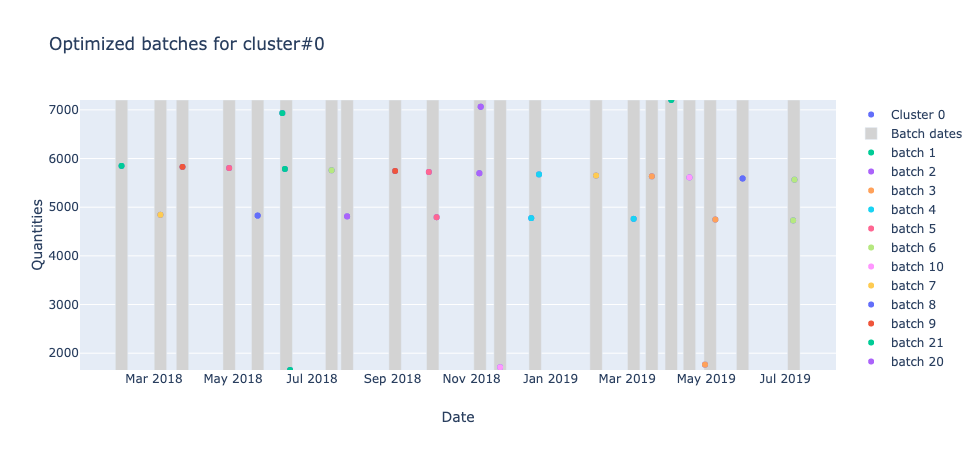

In [21]:
sales_cluster_0_optimized_preds=FaaS.optimize_orders_processing(cluster_0_agg_preds,0,'10 days')

In [22]:
sales_cluster_0_optimized_preds.head()

,noisy_quantity,product,number_of_previous_neighbours,batch,batch_date
noisy_date,,,,,
2018-02-04,5848.283814,CLB1,1.0,21,2018-02-04
2018-03-06,4844.114412,CLA0,1.0,17,2018-03-06
2018-03-23,5828.596558,CLB1,1.0,9,2018-03-23
2018-04-28,5805.081223,CLB1,1.0,14,2018-04-28
2018-05-20,4827.791540,CLA0,1.0,18,2018-05-20


In [23]:
def transform_the_optimized_df(sales_cluster_df,quantities):
    
    local_df=sales_cluster_df.reset_index()
    batch_dates_n_quantities_cluster=local_df.groupby('batch_date').sum()
    batch_dates_n_quantities_cluster['products_quantities_and_dates']=local_df.\
groupby('batch_date')[['product','noisy_quantity','noisy_date']].apply(lambda x: x.values.tolist())
    batch_dates_n_quantities_cluster=batch_dates_n_quantities_cluster[['noisy_quantity',
                                                                      'products_quantities_and_dates']]
    batch_dates_n_quantities_cluster.rename(index=str,
                                         columns={"noisy_quantity": quantities},
                                         inplace=True)
    
    return batch_dates_n_quantities_cluster

In [24]:
batch_dates_n_predicted_quantities_cluster_0=transform_the_optimized_df(sales_cluster_0_optimized_preds,
                                                                        "predicted_quantities")

In [25]:
batch_dates_n_predicted_quantities_cluster_0.head()

,predicted_quantities,products_quantities_and_dates
batch_date,,
2018-02-04 00:00:00,5848.283814,"[[CLB1, 5848.283814175213, 2018-02-04 00:00:00]]"
2018-03-06 00:00:00,4844.114412,"[[CLA0, 4844.114412305247, 2018-03-06 00:00:00]]"
2018-03-23 00:00:00,5828.596558,"[[CLB1, 5828.59655751704, 2018-03-23 00:00:00]]"
2018-04-28 00:00:00,5805.081223,"[[CLB1, 5805.081223158414, 2018-04-28 00:00:00]]"
2018-05-20 00:00:00,4827.791540,"[[CLA0, 4827.7915402883455, 2018-05-20 00:00:00]]"


In [26]:
len(sales_cluster_0_optimized_preds['batch_date'].unique())

21

In [27]:
batch_dates_n_predicted_quantities_cluster_0.shape[0]

21

In [28]:
sales_cluster_0_optimization.head()

,noisy_quantity,product,number_of_previous_neighbours,batch,batch_date
noisy_date,,,,,
2017-12-26,6314.400966,CLB1,1.0,1,2017-12-28 12:00:00
2017-12-28,5038.619159,CLA0,2.0,1,2017-12-28 12:00:00
2017-12-30,1522.967281,CLD3,3.0,1,2017-12-28 12:00:00
2017-12-31,6572.009204,CLC0,4.0,1,2017-12-28 12:00:00
2018-02-11,6181.772772,CLB1,1.0,11,2018-02-11 00:00:00


In [29]:
batch_dates_n_quantities_cluster_0=transform_the_optimized_df(sales_cluster_0_optimization,'quantities')

In [30]:
batch_dates_n_quantities_cluster_0.head()

,quantities,products_quantities_and_dates
batch_date,,
2017-12-28 12:00:00,19447.996610,"[[CLB1, 6314.400965995367, 2017-12-26 00:00:00..."
2018-02-11 00:00:00,6181.772772,"[[CLB1, 6181.772772121883, 2018-02-11 00:00:00]]"
2018-03-15 00:00:00,10236.085409,"[[CLA0, 4658.195180889406, 2018-03-11 00:00:00..."
2018-05-01 00:00:00,5241.655174,"[[CLB1, 5241.6551738544, 2018-05-01 00:00:00]]"
2018-05-18 00:00:00,4676.433462,"[[CLA0, 4676.433462461426, 2018-05-18 00:00:00]]"


In [31]:
batch_dates_n_predicted_quantities_cluster_0.head()

,predicted_quantities,products_quantities_and_dates
batch_date,,
2018-02-04 00:00:00,5848.283814,"[[CLB1, 5848.283814175213, 2018-02-04 00:00:00]]"
2018-03-06 00:00:00,4844.114412,"[[CLA0, 4844.114412305247, 2018-03-06 00:00:00]]"
2018-03-23 00:00:00,5828.596558,"[[CLB1, 5828.59655751704, 2018-03-23 00:00:00]]"
2018-04-28 00:00:00,5805.081223,"[[CLB1, 5805.081223158414, 2018-04-28 00:00:00]]"
2018-05-20 00:00:00,4827.791540,"[[CLA0, 4827.7915402883455, 2018-05-20 00:00:00]]"


In [33]:
batch_dates_n_quantities_cluster_0.reset_index(inplace=True)

In [35]:
batch_dates_n_predicted_quantities_cluster_0.reset_index(inplace=True)

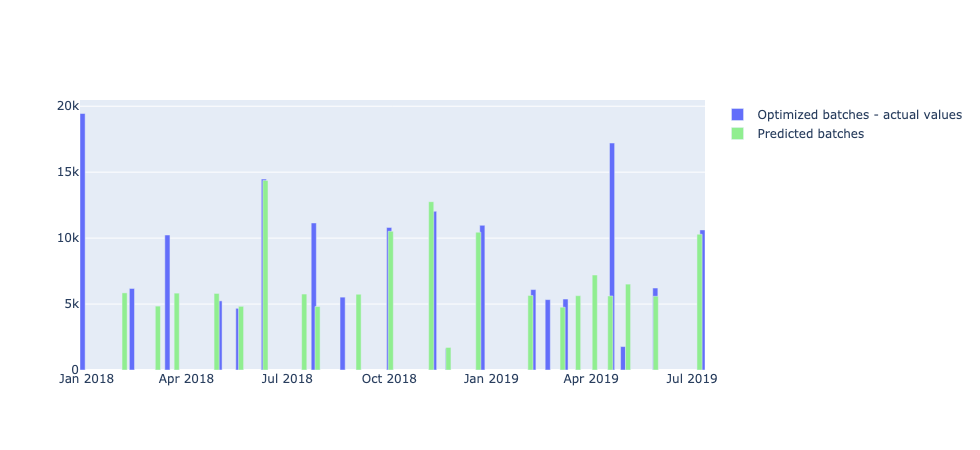

In [61]:
import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Bar(x=batch_dates_n_quantities_cluster_0['batch_date'], 
             y=batch_dates_n_quantities_cluster_0['quantities'],
                    name='Optimized batches - actual values',
                    width=4*10e7))

fig.add_trace(go.Bar(x=batch_dates_n_predicted_quantities_cluster_0['batch_date'], 
             y=batch_dates_n_predicted_quantities_cluster_0['predicted_quantities'],
                    name='Predicted batches',
                    width=4*10e7,
                    marker_color='lightgreen'))

fig.show()

In [62]:
test_year='2019-01-01'

In [64]:
batch_dates_n_quantities_cluster_0[batch_dates_n_quantities_cluster_0['batch_date']>test_year]['batch_date']

12    2019-02-08 00:00:00
13    2019-02-21 00:00:00
14    2019-03-09 00:00:00
15    2019-04-20 00:00:00
16    2019-04-30 00:00:00
17    2019-05-29 00:00:00
18    2019-07-10 12:00:00
Name: batch_date, dtype: object

In [65]:
batch_dates_n_predicted_quantities_cluster_0[batch_dates_n_predicted_quantities_cluster_0['batch_date']>test_year]

,batch_date,predicted_quantities,products_quantities_and_dates
13,2019-02-05 00:00:00,5650.317568,"[[CLB1, 5650.317568010748, 2019-02-05 00:00:00]]"
14,2019-03-06 00:00:00,4760.819826,"[[CLA0, 4760.819825894745, 2019-03-06 00:00:00]]"
15,2019-03-20 00:00:00,5634.458395,"[[CLB1, 5634.458395355974, 2019-03-20 00:00:00]]"
16,2019-04-04 00:00:00,7202.800358,"[[CLC0, 7202.800358486253, 2019-04-04 00:00:00]]"
17,2019-04-18 00:00:00,5612.036806,"[[CLB1, 5612.0368064302575, 2019-04-18 00:00:00]]"
18,2019-05-04 00:00:00,6512.029553,"[[CLD3, 1765.3722024777815, 2019-04-30 00:00:0..."
19,2019-05-29 00:00:00,5590.162086,"[[CLB1, 5590.162085527121, 2019-05-29 00:00:00]]"
20,2019-07-07 12:00:00,10293.180276,"[[CLA0, 4728.174119686502, 2019-07-07 00:00:00..."


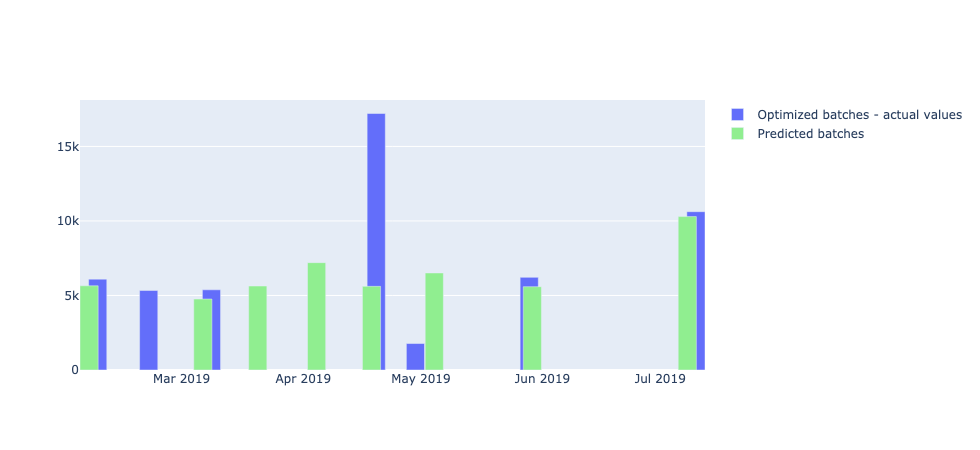

In [66]:
import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Bar(x=batch_dates_n_quantities_cluster_0[batch_dates_n_quantities_cluster_0['batch_date']>test_year]['batch_date'], 
             y=batch_dates_n_quantities_cluster_0[batch_dates_n_quantities_cluster_0['batch_date']>test_year]['quantities'],
                    name='Optimized batches - actual values',
                    width=4*10e7))

fig.add_trace(go.Bar(x=batch_dates_n_predicted_quantities_cluster_0[batch_dates_n_predicted_quantities_cluster_0['batch_date']>test_year]['batch_date'], 
             y=batch_dates_n_predicted_quantities_cluster_0[batch_dates_n_predicted_quantities_cluster_0['batch_date']>test_year]['predicted_quantities'],
                    name='Predicted batches',
                    width=4*10e7,
                    marker_color='lightgreen'))

fig.show()

In [73]:
import numpy as np
total_predicted_quantities=np.sum(batch_dates_n_predicted_quantities_cluster_0['predicted_quantities'])
total_predicted_quantities

144537.6331748403

In [71]:
total_quantities=np.sum(batch_dates_n_quantities_cluster_0['quantities'])
total_quantities

165018.25098985137

In [75]:
100*(total_predicted_quantities/total_quantities)

87.58887717439774